In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
# read in ground_truth_kds.txt as np array
ground_truth = np.loadtxt('../data/experimental_conditions/prot0.1/single_kds.txt')
print(ground_truth.shape)

(300,)


In [50]:
def get_inferred_Kds(path : str):
    """
    Get inferred Kds from PositionWiseKdEstimates.csv file
    """
    df = pd.read_csv(path, sep='\t')
    median_mut_C = df['median mut C'].values
    median_mut_G = df['median mut G'].values
    median_mut_U = df['median mut U'].values
    median_Kds = np.vstack((median_mut_C, median_mut_G, median_mut_U)).T.flatten()
    return median_Kds

In [51]:
prot_01 =  get_inferred_Kds('../data/experimental_conditions/prot0.1/results/PositionWiseKdEstimates.csv')
prot_1 = get_inferred_Kds('../data/experimental_conditions/prot1/results/PositionWiseKdEstimates.csv')
prot_10 = get_inferred_Kds('../data/experimental_conditions/prot10/results/PositionWiseKdEstimates.csv')

print(prot_01.shape)
print(prot_1.shape)
print(prot_10.shape)

(300,)
(300,)
(300,)


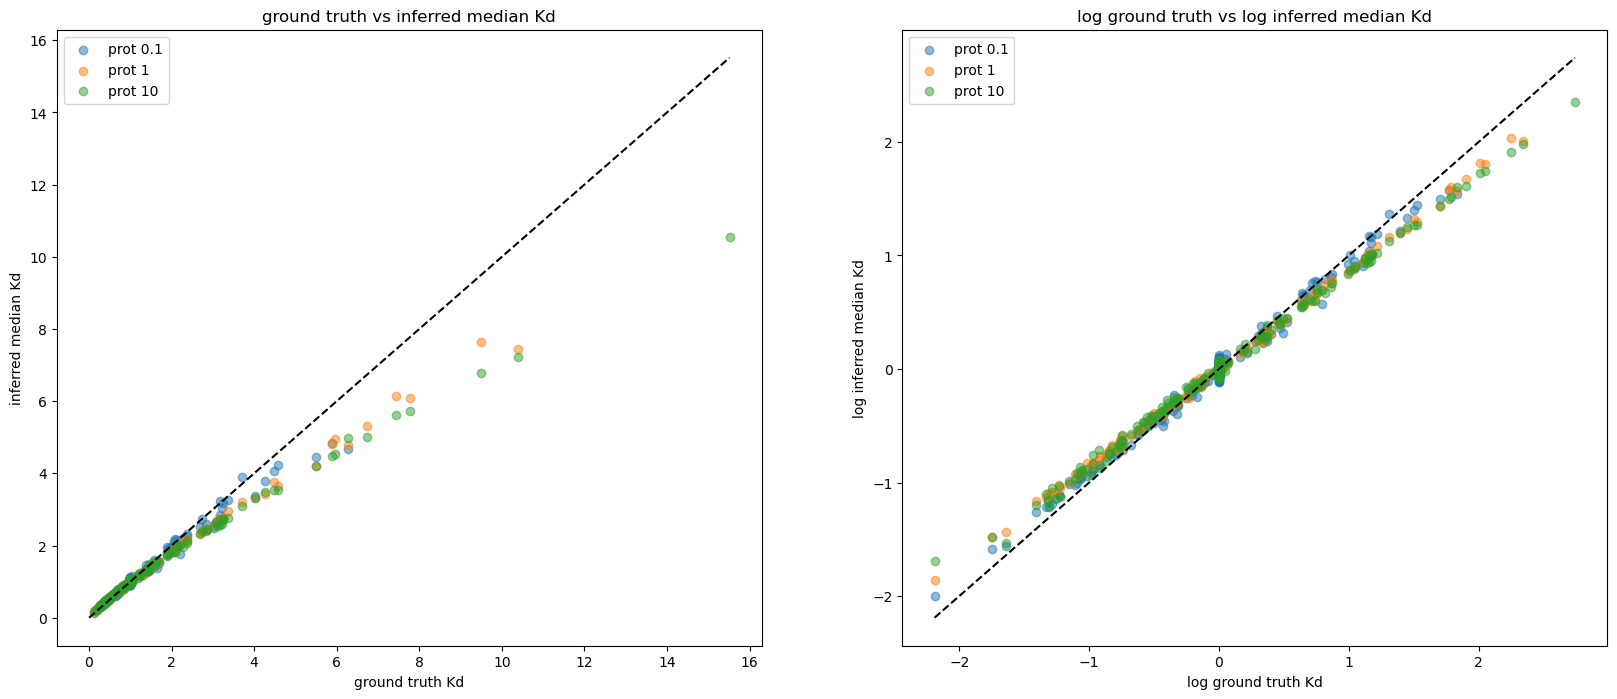

In [52]:
# set up 2 side by side plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# plot ground truth vs inferred median Kds of each protein concentration
ax1.scatter(ground_truth, prot_01, label='prot 0.1', alpha=0.5)
ax1.scatter(ground_truth, prot_1, label='prot 1', alpha=0.5)
ax1.scatter(ground_truth, prot_10, label='prot 10', alpha=0.5)
ax1.set_xlabel('ground truth Kd')
ax1.set_ylabel('inferred median Kd')
ax1.set_title('ground truth vs inferred median Kd')
ax1.legend()
x = np.linspace(0, np.max(ground_truth), 100)
y = x
ax1.plot(x, y, color='black', linestyle='--')

# plot log ground truth vs log inferred median Kds of each protein concentration
ax2.scatter(np.log(ground_truth), np.log(prot_01), label='prot 0.1', alpha=0.5)
ax2.scatter(np.log(ground_truth), np.log(prot_1), label='prot 1', alpha=0.5)
ax2.scatter(np.log(ground_truth), np.log(prot_10), label='prot 10', alpha=0.5)
ax2.set_xlabel('log ground truth Kd')
ax2.set_ylabel('log inferred median Kd')
ax2.set_title('log ground truth vs log inferred median Kd')
ax2.legend()
x = np.linspace(np.min(np.log(ground_truth)), np.max(np.log(ground_truth)), 100)
y = x
ax2.plot(x, y, color='black', linestyle='--')

plt.show()

In [53]:
# define function to compute the expected Kds
def compute_expected_Kds(path_to_unbound_counts : str, path_to_inferred_Kds : str):
    """
    Compute the expected Kds
    """
    # load unbound counts
    unbound_counts = np.loadtxt(path_to_unbound_counts, skiprows=1, dtype=int)
    # remove first column
    unbound_counts = unbound_counts[:, 1:]
    # subtract 0.45 percent from column 3,4 and 5
    unbound_counts[:, 1] = unbound_counts[:, 1] - unbound_counts[:, 1]*0.0045
    unbound_counts[:, 2] = unbound_counts[:, 2] - unbound_counts[:, 2]*0.0045
    unbound_counts[:, 3] = unbound_counts[:, 3] - unbound_counts[:, 3]*0.0045

    # load inferred Kds
    df = pd.read_csv(path_to_inferred_Kds, sep='\t')
    # replace nan with 1
    df = df.fillna(1)

    median_mut_C = df['median mut C'].values
    median_mut_G = df['median mut G'].values
    median_mut_U = df['median mut U'].values

    # stack median_mut_C, median_mut_G, median_mut_U as columns
    median_Kds = np.vstack((median_mut_C, median_mut_G, median_mut_U)).T
    # add column of ones to the left
    median_Kds = np.hstack((np.ones((median_Kds.shape[0], 1)), median_Kds))

    # compute the average Kd weighted by the unbound counts
    weighted_Kds = np.zeros(median_Kds.shape[0])
    for i in range(median_Kds.shape[0]):
        weighted_Kds[i] = np.average(median_Kds[i, :], weights=unbound_counts[i, :])

    expected_sequence_Kd = np.prod(weighted_Kds)

    print('expected sequence Kd: ', expected_sequence_Kd)
    print(weighted_Kds.min(), weighted_Kds.mean(), weighted_Kds.max())

    # repeat each weighted Kd 3 times
    weighted_Kds = np.repeat(weighted_Kds, 3)

    return weighted_Kds, expected_sequence_Kd

In [54]:
inferred_Kds_prot_01_01 = get_inferred_Kds('../data/experimental_conditions/secondFromProt0.1/prot0.1/results/PositionWiseKdEstimates.csv')
inferred_Kds_prot_01_1 = get_inferred_Kds('../data/experimental_conditions/secondFromProt0.1/prot1/results/PositionWiseKdEstimates.csv')
inferred_Kds_prot_01_10 = get_inferred_Kds('../data/experimental_conditions/secondFromProt0.1/prot10/results/PositionWiseKdEstimates.csv')

inferred_Kds_prot_1_01 = get_inferred_Kds('../data/experimental_conditions/secondFromProt1/prot0.1/results/PositionWiseKdEstimates.csv')
inferred_Kds_prot_1_1 = get_inferred_Kds('../data/experimental_conditions/secondFromProt1/prot1/results/PositionWiseKdEstimates.csv')
inferred_Kds_prot_1_10 = get_inferred_Kds('../data/experimental_conditions/secondFromProt1/prot10/results/PositionWiseKdEstimates.csv')

inferred_Kds_prot_10_01 = get_inferred_Kds('../data/experimental_conditions/secondFromProt10/prot0.1/results/PositionWiseKdEstimates.csv')
inferred_Kds_prot_10_1 = get_inferred_Kds('../data/experimental_conditions/secondFromProt10/prot1/results/PositionWiseKdEstimates.csv')
inferred_Kds_prot_10_10 = get_inferred_Kds('../data/experimental_conditions/secondFromProt10/prot10/results/PositionWiseKdEstimates.csv')

print(inferred_Kds_prot_01_01.shape)
print(inferred_Kds_prot_01_1.shape)
print(inferred_Kds_prot_01_10.shape)

print(inferred_Kds_prot_1_01.shape)
print(inferred_Kds_prot_1_1.shape)
print(inferred_Kds_prot_1_10.shape)

print(inferred_Kds_prot_10_01.shape)
print(inferred_Kds_prot_10_1.shape)
print(inferred_Kds_prot_10_10.shape)

(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)


In [55]:
expected_Kds_prot_01, expected_sequence_Kds_prot_01 = compute_expected_Kds('../data/experimental_conditions/prot0.1/1d/4.txt', '../data/experimental_conditions/prot0.1/results/PositionWiseKdEstimates.csv')
expected_Kds_prot_1, expected_sequence_Kds_prot_1= compute_expected_Kds('../data/experimental_conditions/prot0.1/1d/4.txt', '../data/experimental_conditions/prot1/results/PositionWiseKdEstimates.csv')
expected_Kds_prot_10, expected_sequence_Kds_prot_10 = compute_expected_Kds('../data/experimental_conditions/prot0.1/1d/4.txt', '../data/experimental_conditions/prot10/results/PositionWiseKdEstimates.csv')

print(expected_Kds_prot_01.shape)
print(expected_Kds_prot_1.shape)
print(expected_Kds_prot_10.shape)

expected sequence Kd:  1.4283202276208211
0.9851036611927749 1.0036455067421748 1.0642213399398823
expected sequence Kd:  1.8189462962224145
0.9855506314759787 1.0061284045821752 1.0617946050251021
expected sequence Kd:  1.919318889040536
0.9852966832661364 1.006694136894805 1.0969068335391057
(300,)
(300,)
(300,)


In [56]:
corrected_Kds_prot_01_01 = inferred_Kds_prot_01_01 * expected_Kds_prot_01
corrected_Kds_prot_01_1 = inferred_Kds_prot_01_1 * expected_Kds_prot_01
corrected_Kds_prot_01_10 = inferred_Kds_prot_01_10 * expected_Kds_prot_01

corrected_Kds_prot_1_01 = inferred_Kds_prot_1_01 * expected_Kds_prot_1
corrected_Kds_prot_1_1 = inferred_Kds_prot_1_1 * expected_Kds_prot_1
corrected_Kds_prot_1_10 = inferred_Kds_prot_1_10 * expected_Kds_prot_1

corrected_Kds_prot_10_01 = inferred_Kds_prot_10_01 * expected_Kds_prot_10
corrected_Kds_prot_10_1 = inferred_Kds_prot_10_1 * expected_Kds_prot_10
corrected_Kds_prot_10_10 = inferred_Kds_prot_10_10 * expected_Kds_prot_10

print(corrected_Kds_prot_01_01.shape)
print(corrected_Kds_prot_01_1.shape)
print(corrected_Kds_prot_01_10.shape)

print(corrected_Kds_prot_1_01.shape)
print(corrected_Kds_prot_1_1.shape)
print(corrected_Kds_prot_1_10.shape)

print(corrected_Kds_prot_10_01.shape)
print(corrected_Kds_prot_10_1.shape)
print(corrected_Kds_prot_10_10.shape)

(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)
(300,)


In [57]:
def comparison_plot(ground_truth_Kds, inferred_Kds_1, inferred_Kds_2, inferred_Kds_3, corrected_Kds_1, corrected_Kds_2, corrected_Kds_3, title : str):
    """
    Plot the comparison of ground truth vs inferred Kds and corrected Kds
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    # plot ground truth vs inferred median Kds of each protein concentration
    ax1.scatter(ground_truth_Kds, inferred_Kds_1, label='prot 0.1', alpha=0.5)
    ax1.scatter(ground_truth_Kds, inferred_Kds_2, label='prot 1', alpha=0.5)
    ax1.scatter(ground_truth_Kds, inferred_Kds_3, label='prot 10', alpha=0.5)
    ax1.set_xlabel('ground truth Kd')
    ax1.set_ylabel('inferred median Kd')
    ax1.legend()
    x = np.linspace(0, np.max(ground_truth_Kds), 100)
    y = x
    ax1.plot(x, y, color='black', linestyle='--')

    # plot log ground truth vs log inferred median Kds of each protein concentration
    ax2.scatter(np.log(ground_truth_Kds), np.log(inferred_Kds_1), label='prot 0.1', alpha=0.5)
    ax2.scatter(np.log(ground_truth_Kds), np.log(inferred_Kds_2), label='prot 1', alpha=0.5)
    ax2.scatter(np.log(ground_truth_Kds), np.log(inferred_Kds_3), label='prot 10', alpha=0.5)
    ax2.set_xlabel('log ground truth Kd')
    ax2.set_ylabel('log inferred median Kd')
    ax2.set_title(title)
    ax2.legend()
    x = np.linspace(np.min(np.log(ground_truth_Kds)), np.max(np.log(ground_truth_Kds)), 100)
    y = x
    ax2.plot(x, y, color='black', linestyle='--')

    # set overall title
    fig.suptitle(title)

    plt.show()

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

    # plot ground truth vs corrected median Kds of each protein concentration
    ax1.scatter(ground_truth_Kds, corrected_Kds_1, label='prot 0.1', alpha=0.5)
    ax1.scatter(ground_truth_Kds, corrected_Kds_2, label='prot 1', alpha=0.5)
    ax1.scatter(ground_truth_Kds, corrected_Kds_3, label='prot 10', alpha=0.5)
    ax1.set_xlabel('ground truth Kd')
    ax1.set_ylabel('corrected median Kd')
    ax1.set_title(title)
    ax1.legend()
    x = np.linspace(0, np.max(ground_truth_Kds), 100)
    y = x
    ax1.plot(x, y, color='black', linestyle='--')

    # plot log ground truth vs log corrected median Kds of each protein concentration
    ax2.scatter(np.log(ground_truth_Kds), np.log(corrected_Kds_1), label='prot 0.1', alpha=0.5)
    ax2.scatter(np.log(ground_truth_Kds), np.log(corrected_Kds_2), label='prot 1', alpha=0.5)
    ax2.scatter(np.log(ground_truth_Kds), np.log(corrected_Kds_3), label='prot 10', alpha=0.5)
    ax2.set_xlabel('log ground truth Kd')
    ax2.set_ylabel('log corrected median Kd')
    ax2.set_title(title)
    ax2.legend()
    x = np.linspace(np.min(np.log(ground_truth_Kds)), np.max(np.log(ground_truth_Kds)), 100)
    y = x
    ax2.plot(x, y, color='black', linestyle='--')

    # set overall title
    fig.suptitle(title + ', corrected')

    plt.show()
    
    # print squared error for inferred Kds where inferred Kds are not nan
    print('squared error for inferred Kds')
    print(np.nanmean(np.square(ground_truth_Kds - inferred_Kds_1)))
    print(np.nanmean(np.square(ground_truth_Kds - inferred_Kds_2)))
    print(np.nanmean(np.square(ground_truth_Kds - inferred_Kds_3)))

    # print squared error for corrected Kds where corrected Kds are not nan
    print('squared error for corrected Kds')
    print(np.nanmean(np.square(ground_truth_Kds - corrected_Kds_1)))
    print(np.nanmean(np.square(ground_truth_Kds - corrected_Kds_2)))
    print(np.nanmean(np.square(ground_truth_Kds - corrected_Kds_3)))


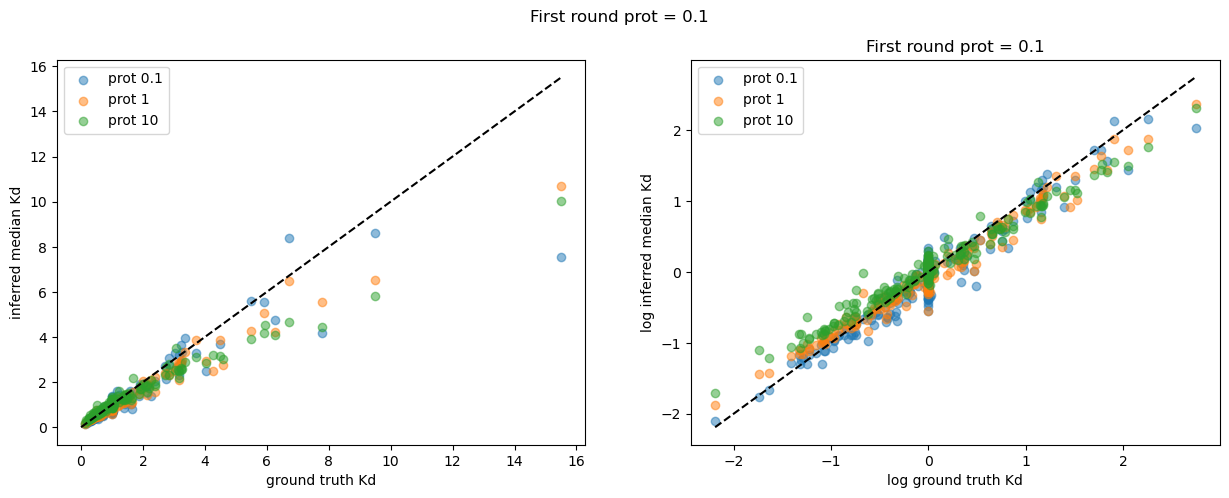

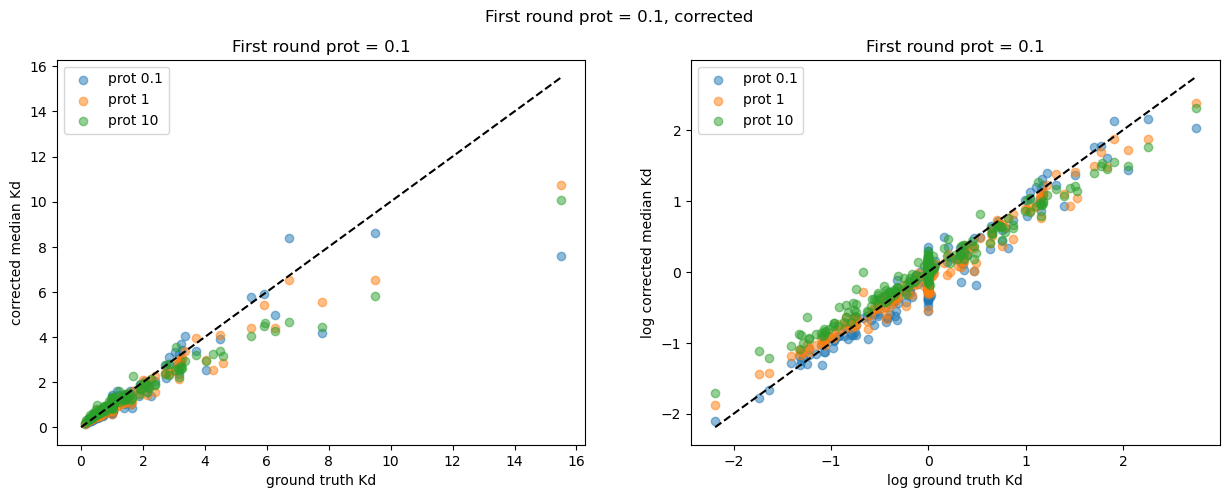

squared error for inferred Kds
0.3266727920346332
0.20025466415069856
0.29275093757430554
squared error for corrected Kds
0.31959524670623124
0.18832307684376842
0.27702020805771743


In [58]:
comparison_plot(ground_truth, inferred_Kds_prot_01_01, inferred_Kds_prot_01_1, inferred_Kds_prot_01_10, corrected_Kds_prot_01_01, corrected_Kds_prot_01_1, corrected_Kds_prot_01_10, 'First round prot = 0.1')

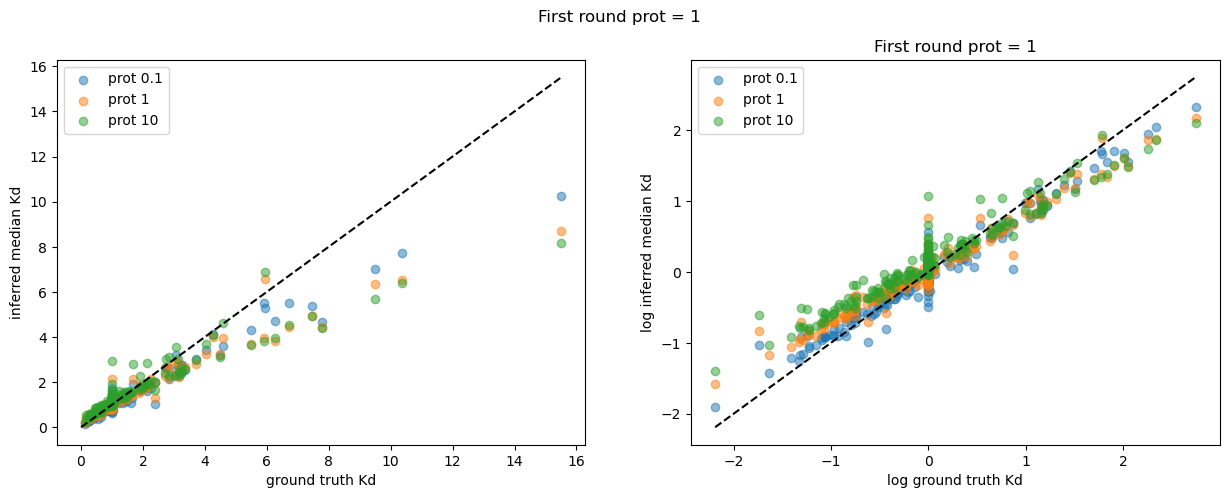

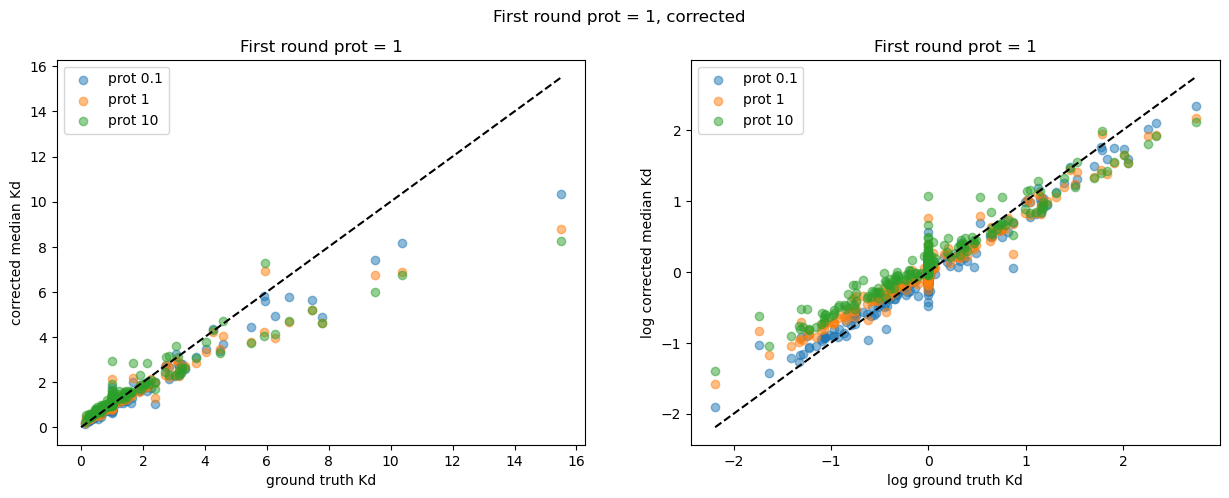

squared error for inferred Kds
0.2513754610124627
0.40549113493407335
0.47988132504740927
squared error for corrected Kds
0.2161245498550836
0.36516953146612185
0.442277862570076


In [59]:
comparison_plot(ground_truth, inferred_Kds_prot_1_01, inferred_Kds_prot_1_1, inferred_Kds_prot_1_10, corrected_Kds_prot_1_01, corrected_Kds_prot_1_1, corrected_Kds_prot_1_10, 'First round prot = 1')

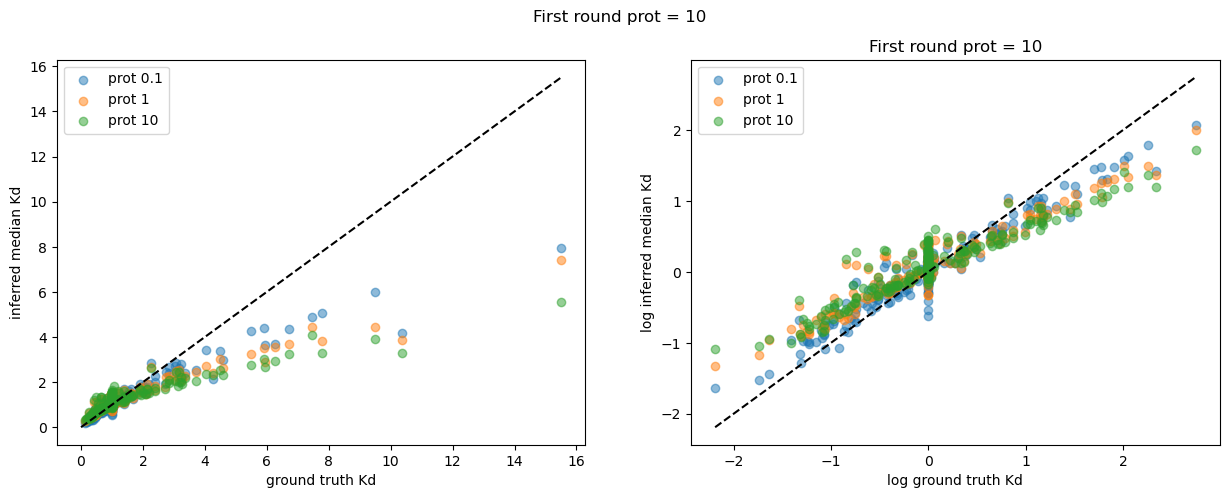

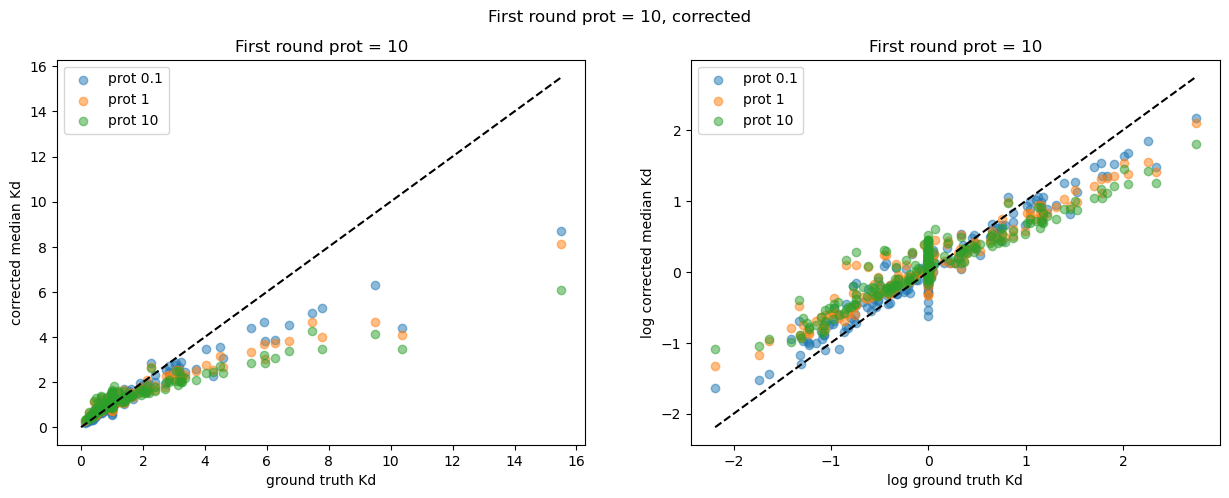

squared error for inferred Kds
0.5569754684489652
0.7635803946837465
1.0285762570712373
squared error for corrected Kds
0.4781255648116123
0.6807014855667665
0.9477301651429549


In [60]:
comparison_plot(ground_truth, inferred_Kds_prot_10_01, inferred_Kds_prot_10_1, inferred_Kds_prot_10_10, corrected_Kds_prot_10_01, corrected_Kds_prot_10_1, corrected_Kds_prot_10_10, 'First round prot = 10')